In [38]:
from segment_anything import SamPredictor, sam_model_registry
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

In [21]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30 / 255, 144 / 255, 255 / 255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

(781, 1250, 3)


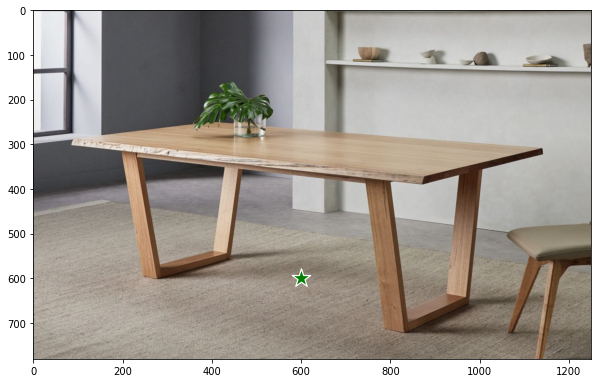

In [57]:
# load image
image = cv2.imread("./images/table1.jpeg")   # BGR format
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)

input_point = np.array([[600, 600]])
input_label = np.array([1])

plt.figure(figsize=(10, 10))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.show()

In [53]:
sam = sam_model_registry["vit_b"](checkpoint="./sam_checkpoints/sam_vit_b_01ec64.pth")
predictor = SamPredictor(sam)
predictor.set_image(image)
starttime = time.time()
masks, scores, logits = predictor.predict(point_coords=input_point,
                                point_labels=input_label,
                                multimask_output=True)
print("Inference time: {}".format(time.time() - starttime))

Inference time: 0.07064700126647949


In [54]:
masks.shape

(3, 781, 1250)

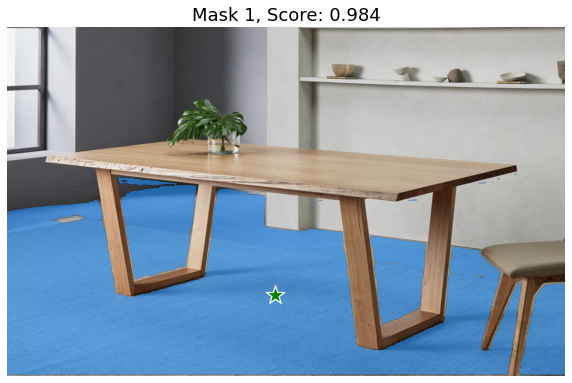

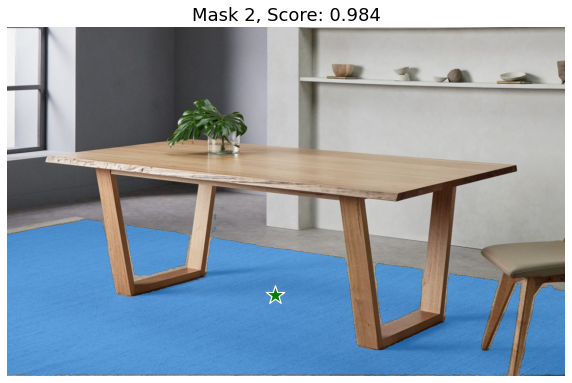

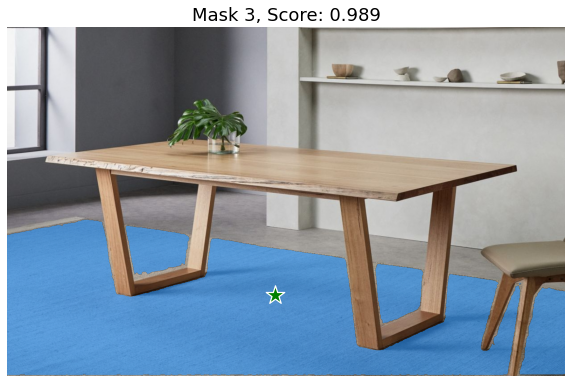

In [55]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()

In [44]:
input_points = np.array([[600, 300], [600, 600]])
input_labels = np.array([1, 0])
predictor.set_image(image)
masks, scores, logits = predictor.predict(point_coords=input_points,
                                point_labels=input_labels,
                                multimask_output=True)

In [45]:
masks.shape

(3, 781, 1250)

In [51]:
scores.shape

(3,)

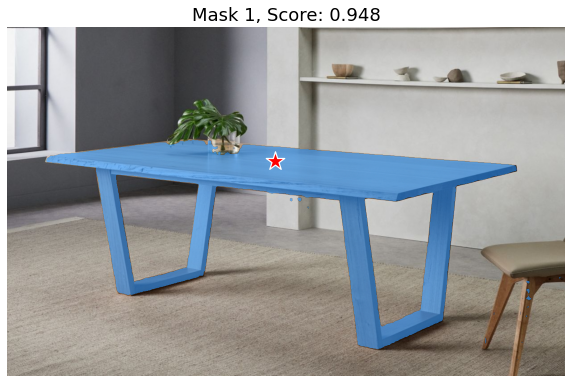

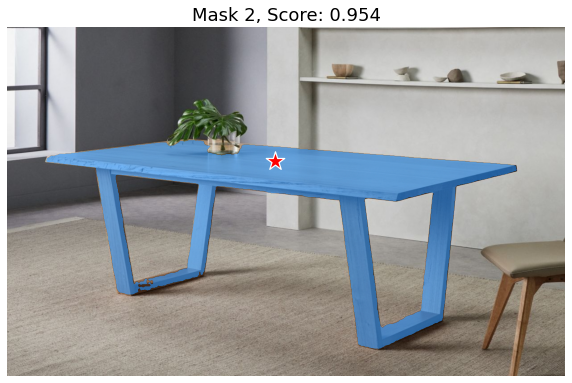

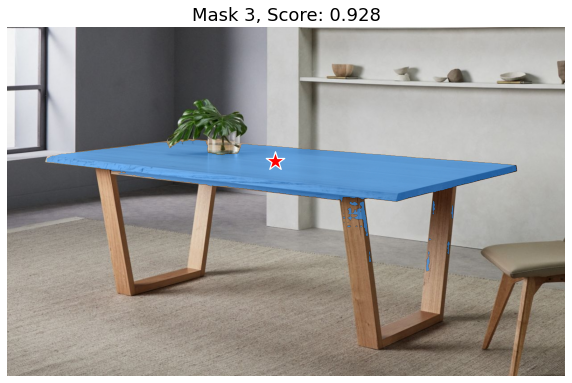

In [46]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()

# Pixellib

In [1]:
from ultralytics import YOLO

ModuleNotFoundError: No module named 'ultralytics'

In [2]:
!wget -O deeplabv3.tflite -q https://storage.googleapis.com/mediapipe-models/image_segmenter/deeplab_v3/float32/1/deeplab_v3.tflite

zsh:1: command not found: wget


In [1]:
import mediapipe as mp

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [2]:
from mmseg.apis import inference_model

ModuleNotFoundError: No module named 'mmseg.apis'; 'mmseg' is not a package